In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
# Baca deskripsi dataset
# Tahap ini mungkin diperlukan untuk lebih memahami dataset
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

In [4]:
label_counts = np.bincount(mnist.target.astype(int))

In [5]:
for index, value in enumerate(label_counts):
    print(f'nilai {index} = {value}')

nilai 0 = 6903
nilai 1 = 7877
nilai 2 = 6990
nilai 3 = 7141
nilai 4 = 6824
nilai 5 = 6313
nilai 6 = 6876
nilai 7 = 7293
nilai 8 = 6825
nilai 9 = 6958


2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

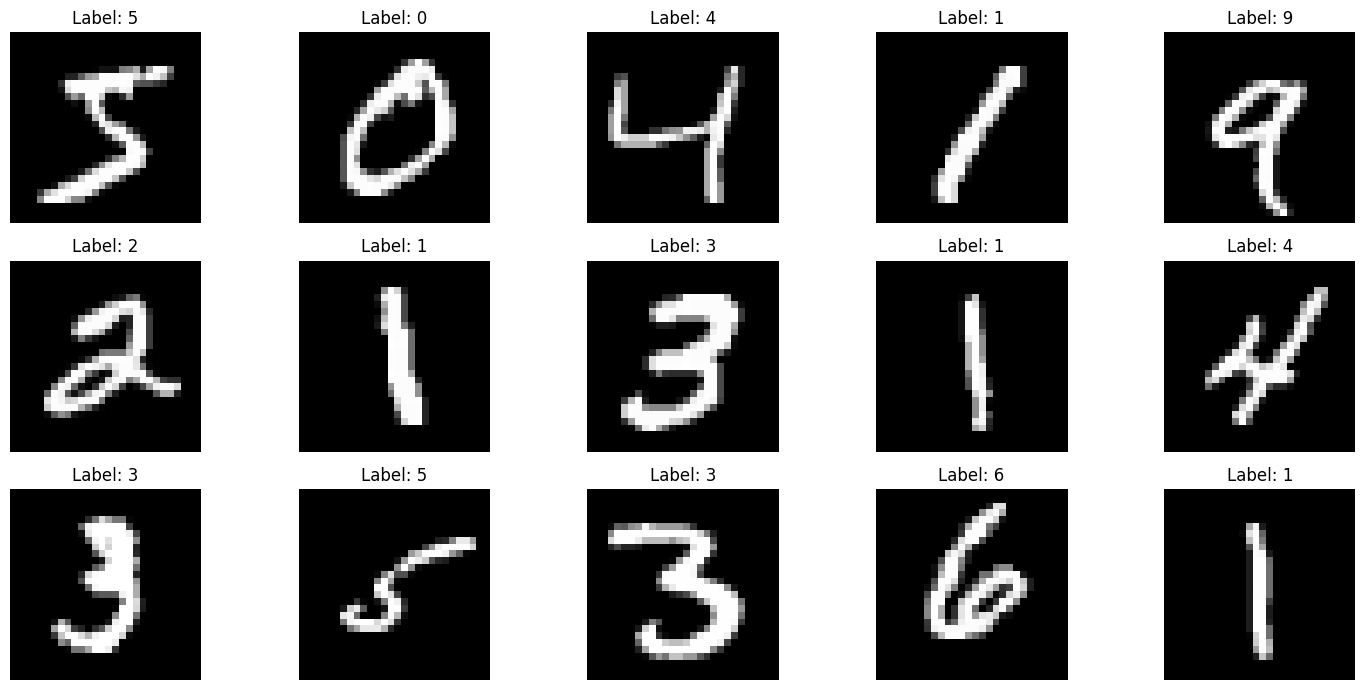

In [6]:
fig, axes = plt.subplots(3, 5, figsize=(15, 7))
for i, ax in enumerate(axes.flat):
    ax.imshow(mnist.data.iloc[i].values.reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {mnist.target[i]}")
    ax.axis('off')
plt.tight_layout()

3. Lakukan proses ekstraksi fitur pada data MNIST.

In [9]:
X = mnist.data.astype('float64')
y = mnist.target

print(y)

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


In [10]:
from sklearn.decomposition import PCA

n_components = 50
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

print(X_pca)

[[ 122.25525533 -316.2338439   -51.13183087 ...  -71.53607891
    20.26053602   81.23987204]
 [1010.49400346 -289.96362059  576.12074518 ... -152.38679517
   131.01765527   40.10242004]
 [ -58.99594719  393.697445   -161.99818413 ...   55.24295342
  -176.02766744  -64.85317129]
 ...
 [-271.50701323  590.07850009  341.36886919 ...   -6.60520169
   -79.63551889  -51.93017584]
 [-310.22482291 -116.72715081  635.71999693 ...  -16.13065561
   -73.0455297  -254.12879362]
 [1058.86212574  -83.39253844  731.34218396 ...  -94.89282349
    89.06399116  -55.05700971]]


4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

5. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
naive_bayes = GaussianNB()
svm = SVC(kernel='rbf', C=1.0)

naive_bayes.fit(X_train, y_train)
svm.fit(X_train, y_train)

SVC()

6. Evaluasi model yang Anda buat terhadap data training dan data testing.

In [17]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [18]:
train_preds = naive_bayes.predict(X_train)
test_preds = naive_bayes.predict(X_test)

train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

train_report = classification_report(y_train, train_preds)
test_report = classification_report(y_test, test_preds)

train_confusion_matrix = confusion_matrix(y_train, train_preds)
test_confusion_matrix = confusion_matrix(y_test, test_preds)

print("Train Accuracy ", train_accuracy)
print("Test Accuracy ", test_accuracy)
print("Train Classification Report ", train_report)
print("Test Classification Report", test_report)
print("Train Confusion Matrix ", train_confusion_matrix)    
print("Test Confusion Matrix ", test_confusion_matrix)

Train Accuracy  0.5604761904761905
Test Accuracy  0.5634285714285714
Train Classification Report                precision    recall  f1-score   support

           0       0.76      0.89      0.82      6220
           1       0.81      0.94      0.87      7077
           2       0.88      0.31      0.46      6316
           3       0.75      0.36      0.49      6381
           4       0.84      0.14      0.24      6213
           5       0.60      0.05      0.09      5655
           6       0.62      0.95      0.75      6199
           7       0.90      0.30      0.45      6569
           8       0.29      0.64      0.40      6132
           9       0.38      0.95      0.54      6238

    accuracy                           0.56     63000
   macro avg       0.68      0.55      0.51     63000
weighted avg       0.69      0.56      0.52     63000

Test Classification Report               precision    recall  f1-score   support

           0       0.75      0.89      0.81       683
       

In [19]:
train_preds = svm.predict(X_train)
test_preds = svm.predict(X_test)

train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

train_report = classification_report(y_train, train_preds)
test_report = classification_report(y_test, test_preds)

train_confusion_matrix = confusion_matrix(y_train, train_preds)
test_confusion_matrix = confusion_matrix(y_test, test_preds)

print("Train Accuracy ", train_accuracy)
print("Test Accuracy ", test_accuracy)
print("Train Classification Report ", train_report)
print("Test Classification Report", test_report)
print("Train Confusion Matrix ", train_confusion_matrix)    
print("Test Confusion Matrix ", test_confusion_matrix)

Train Accuracy  0.9902222222222222
Test Accuracy  0.975
Train Classification Report                precision    recall  f1-score   support

           0       0.99      1.00      0.99      6220
           1       0.99      1.00      0.99      7077
           2       0.99      0.99      0.99      6316
           3       0.99      0.99      0.99      6381
           4       0.99      0.99      0.99      6213
           5       0.99      0.99      0.99      5655
           6       0.99      1.00      0.99      6199
           7       0.99      0.99      0.99      6569
           8       0.99      0.99      0.99      6132
           9       0.99      0.98      0.98      6238

    accuracy                           0.99     63000
   macro avg       0.99      0.99      0.99     63000
weighted avg       0.99      0.99      0.99     63000

Test Classification Report               precision    recall  f1-score   support

           0       0.99      0.99      0.99       683
           1       0

In [20]:
def show_images_with_predictions(model, X_test, y_test):
    predictions = model.predict(X_test)

    fig, axes = plt.subplots(3, 5, figsize=(10, 7))
    for i, ax in enumerate(axes.flat):
        ax.imshow(X_test.iloc[i].values.reshape(28, 28), cmap='gray')
        ax.set_title(f"True: {y_test.iloc[i]}\nPred: {predictions[i]}")
        ax.axis('off')
    plt.tight_layout()

show_images_with_predictions(naive_bayes, X_test, y_test)